In [1]:
!wget http://www.gavrila.net/data/Daimler/bmvc13-flohr-gavrila/PedCut2013_SegmentationDataset.tar.gz

--2019-03-09 22:33:42--  http://www.gavrila.net/data/Daimler/bmvc13-flohr-gavrila/PedCut2013_SegmentationDataset.tar.gz
Resolving www.gavrila.net (www.gavrila.net)... 134.119.45.88, 2a00:1158:1000:300::558
Connecting to www.gavrila.net (www.gavrila.net)|134.119.45.88|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54546195 (52M) [application/x-tar]
Saving to: ‘PedCut2013_SegmentationDataset.tar.gz’

PedCut2013_Segmenta 100%[===================>]  52.02M  18.9MB/s    in 2.8s    

2019-03-09 22:33:46 (18.9 MB/s) - ‘PedCut2013_SegmentationDataset.tar.gz’ saved [54546195/54546195]



In [0]:
!tar -xzf PedCut2013_SegmentationDataset.tar.gz

In [3]:
import os
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Lambda, Conv2D, Dense, Dropout, InputLayer, Flatten, MaxPool2D
import keras.backend as K

%matplotlib inline

data = {}
for root, dirs, files in os.walk('data'):
    if files:
        data[root] =files

for k, v in data.items():
    print("{} -> {} images".format(k, len(v)))

Using TensorFlow backend.


data/testData/left_disparity -> 300 images
data/testData/left_images -> 300 images
data/testData/left_groundTruth -> 300 images
data/completeData/left_disparity -> 785 images
data/completeData/left_images -> 785 images
data/completeData/left_groundTruth -> 785 images
data/validationData/left_disparity -> 30 images
data/validationData/left_images -> 30 images
data/validationData/left_groundTruth -> 30 images


In [4]:
x_train_dir = 'data/completeData/left_images'
y_train_dir = 'data/completeData/left_groundTruth'

img_height = 200
img_width = 125
h = int(img_height/4)
w = int(img_width/5)


n_channels = 3
m = len(data[x_train_dir])
# sample = plt.imread(os.path.join(x_train_dir, data[x_train_dir][0]))
# print(sample.shape)

x_train = np.empty((m, img_height, img_width, n_channels))
y_train = np.empty((m, h, w,1))
y_train_unrolled = np.empty((m, h*w))

for i in range(m):
    x_img_path = os.path.join(x_train_dir, data[x_train_dir][i])
    x_img = plt.imread(x_img_path)
    x_img = resize(x_img, (img_height, img_width))
    x_train[i,:,:,:] = x_img
    y_img_path = os.path.join(y_train_dir, data[y_train_dir][i])
    y_img = plt.imread(y_img_path)
    y_img = resize(y_img, (h,w))
    y_train[i,:,:,0] = y_img
    y_train_unrolled[i] = y_img.reshape((y_img.shape[0]*y_img.shape[1]))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


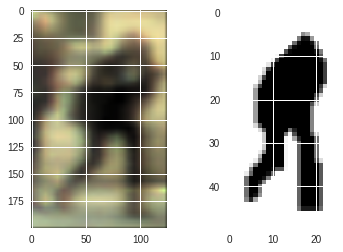

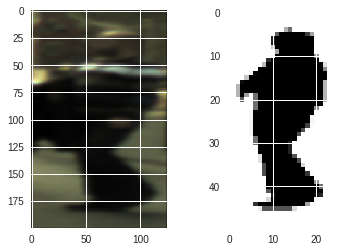

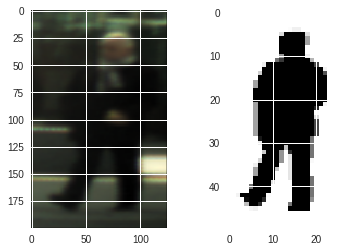

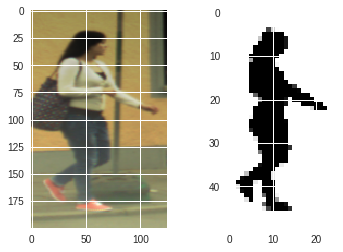

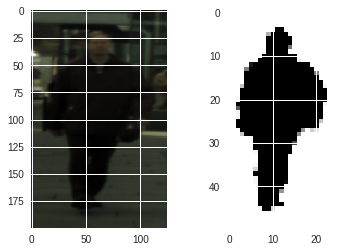

In [5]:
samples = np.random.randint(0,m,5)
for i in range(len(samples)):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(x_train[samples[i]])
    plt.subplot(1,2,2)
    plt.imshow(y_train[samples[i],:,:,0])

In [6]:
x_test_dir = 'data/testData/left_images'
y_test_dir = 'data/testData/left_groundTruth'

img_height = 200
img_width = 125
n_channels = 3
m = len(data[x_test_dir])
# sample = plt.imread(os.path.join(x_train_dir, data[x_train_dir][0]))
# print(sample.shape)

x_test = np.empty((m, img_height, img_width, n_channels))
y_test = np.empty((m, h, w,1))
y_test_unrolled = np.empty((m, h*w))

for i in range(m):
    x_img_path = os.path.join(x_test_dir, data[x_test_dir][i])
    x_img = plt.imread(x_img_path)
    x_img = resize(x_img, (img_height, img_width))
    x_test[i,:,:,:] = x_img
    y_img_path = os.path.join(y_test_dir, data[y_test_dir][i])
    y_img = plt.imread(y_img_path)
    y_img = resize(y_img, (h, w))
    y_test[i,:,:,0] = y_img
    y_test_unrolled[i] = y_img.reshape((y_img.shape[0]*y_img.shape[1]))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [7]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train.shape, y_train_unrolled.shape, x_test.shape, y_test_unrolled.shape)

(785, 200, 125, 3) (785, 50, 25, 1) (300, 200, 125, 3) (300, 50, 25, 1)
(785, 200, 125, 3) (785, 1250) (300, 200, 125, 3) (300, 1250)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_6 (Lambda)            (None, 200, 125, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 198, 123, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 196, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 65, 40, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 63, 38, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 61, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 20, 12, 64)        0         
__________

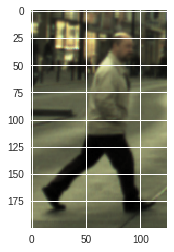

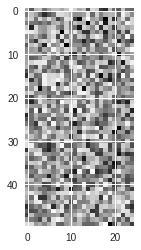

In [27]:
model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1], x_train.shape[2], 3)))
model.add(Lambda(lambda x: (x - K.mean(x)) / K.std(x)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(3))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(3))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1250, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

y_hat = model.predict(np.expand_dims(x_train[0],axis=0))
print(y_hat.shape)
y_hat = y_hat.reshape((1,h,w,1))
print(y_hat.shape)
plt.figure()
plt.imshow(x_train[0])
plt.figure()
plt.imshow(y_hat[0,:,:,0])

In [28]:
history = model.fit(x_train, y_train_unrolled, epochs=50, verbose=2)

Epoch 1/50
 - 4s - loss: 3089.7553
Epoch 2/50
 - 2s - loss: 2940.6378
Epoch 3/50
 - 2s - loss: 2921.8694
Epoch 4/50
 - 2s - loss: 2919.0819
Epoch 5/50
 - 2s - loss: 2917.2734
Epoch 6/50
 - 2s - loss: 2915.1581
Epoch 7/50
 - 2s - loss: 2911.5674
Epoch 8/50
 - 2s - loss: 2905.6534
Epoch 9/50
 - 2s - loss: 2897.2686
Epoch 10/50
 - 2s - loss: 2890.5250
Epoch 11/50
 - 2s - loss: 2884.1624
Epoch 12/50
 - 2s - loss: 2879.9140
Epoch 13/50
 - 2s - loss: 2877.0645
Epoch 14/50
 - 2s - loss: 2874.6016
Epoch 15/50
 - 2s - loss: 2872.0717
Epoch 16/50
 - 2s - loss: 2870.1886
Epoch 17/50
 - 2s - loss: 2867.4314
Epoch 18/50
 - 2s - loss: 2865.3223
Epoch 19/50
 - 2s - loss: 2863.3130
Epoch 20/50
 - 2s - loss: 2861.8070
Epoch 21/50
 - 2s - loss: 2860.2116
Epoch 22/50
 - 2s - loss: 2858.6798
Epoch 23/50
 - 2s - loss: 2857.4451
Epoch 24/50
 - 2s - loss: 2855.8224
Epoch 25/50
 - 2s - loss: 2854.5914
Epoch 26/50
 - 2s - loss: 2853.7487
Epoch 27/50
 - 2s - loss: 2852.3802
Epoch 28/50
 - 2s - loss: 2851.5345
E

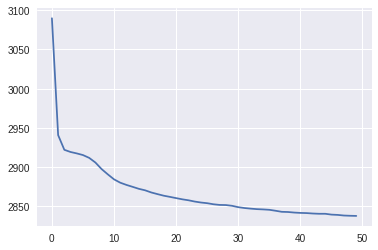

In [34]:
plt.plot(history.history['loss'])

(1, 1250)
(1, 50, 25, 1)


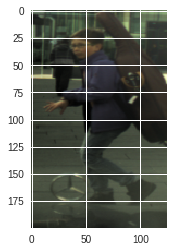

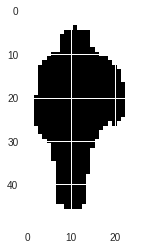

In [56]:
sample_id = 100
y_hat = model.predict(np.expand_dims(x_test[sample_id],axis=0))
print(y_hat.shape)
y_hat = y_hat.reshape((1,h,w,1))
print(y_hat.shape)
plt.figure()
plt.imshow(x_train[sample_id])
plt.figure()
plt.imshow(y_hat[0,:,:,0])

In [68]:
x_valid_dir = 'data/validationData/left_images'
y_valid_dir = 'data/validationData/left_groundTruth'

img_height = 200
img_width = 125
h = int(img_height/4)
w = int(img_width/5)
n_channels = 3
m = len(data[x_valid_dir])


x_valid = np.empty((m, img_height, img_width, n_channels))
y_valid = np.empty((m, h, w,1))
y_valid_unrolled = np.empty((m, h*w))

for i in range(m):
    x_img_path = os.path.join(x_valid_dir, data[x_valid_dir][i])
    x_img = plt.imread(x_img_path)
    x_img = resize(x_img, (img_height, img_width))
    x_valid[i,:,:,:] = x_img
    y_img_path = os.path.join(y_valid_dir, data[y_valid_dir][i])
    y_img = plt.imread(y_img_path)
    y_img = resize(y_img, (h,w))
    y_valid[i,:,:,0] = y_img
    y_valid_unrolled[i] = y_img.reshape((y_img.shape[0]*y_img.shape[1]))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [0]:
y_hat = model.predict(x_valid)
y_hat = y_hat.reshape((y_hat.shape[0],h,w,1))

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


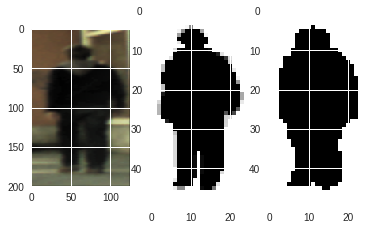

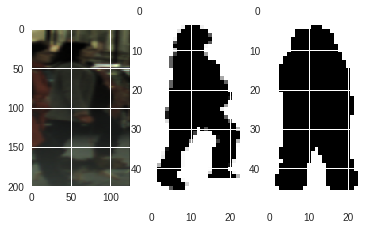

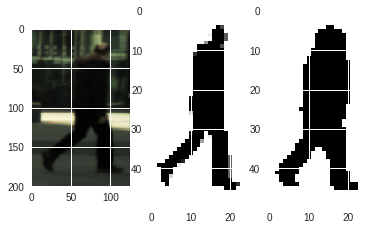

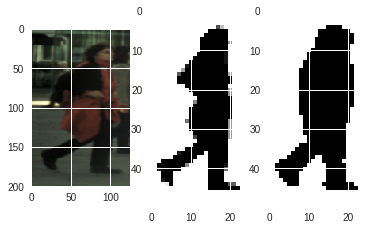

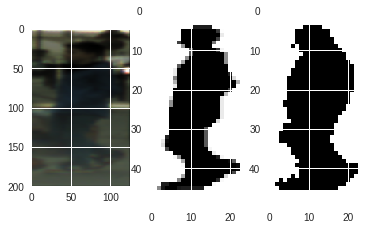

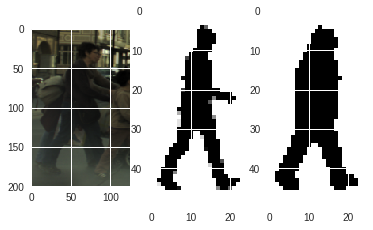

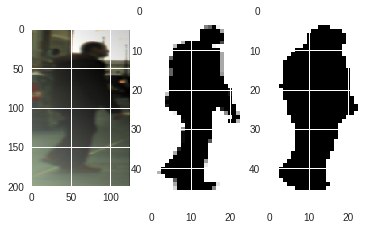

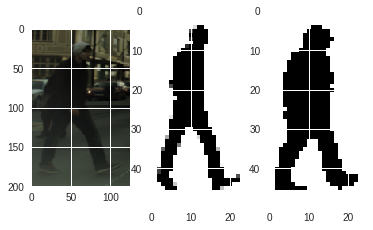

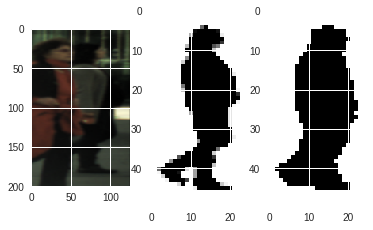

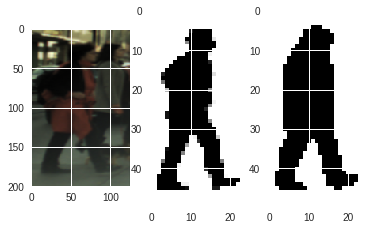

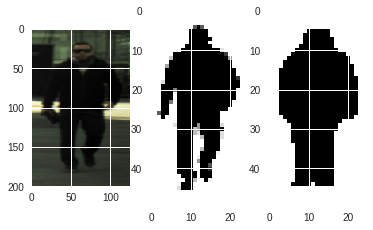

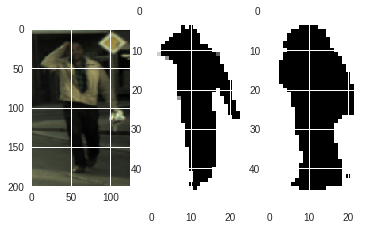

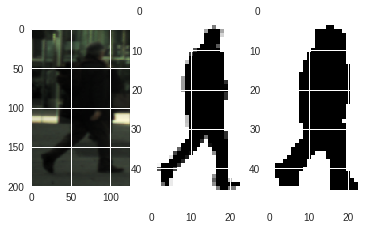

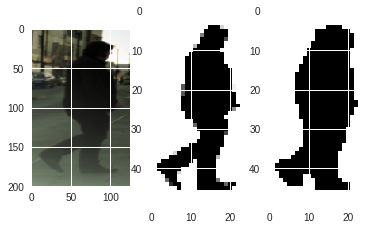

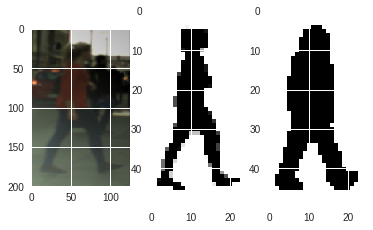

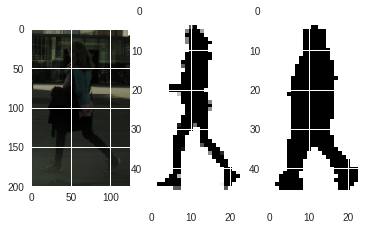

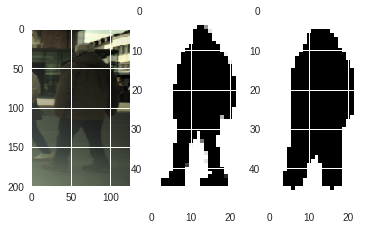

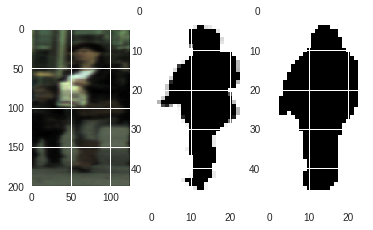

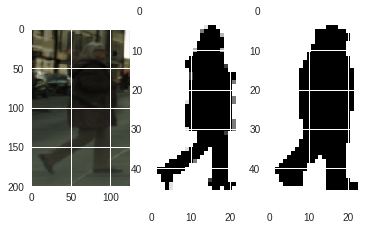

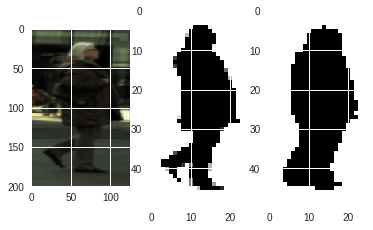

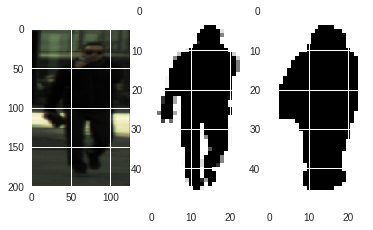

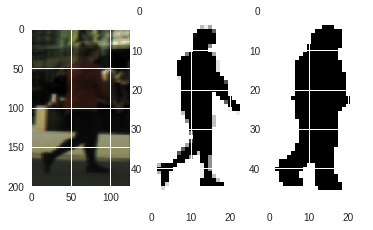

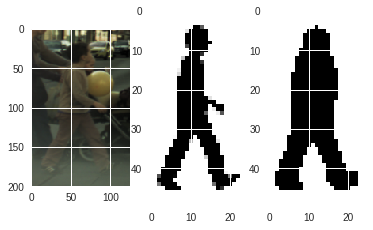

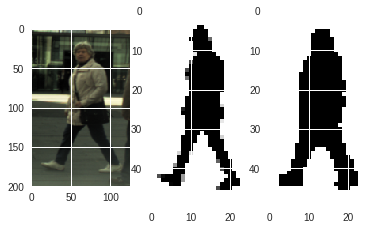

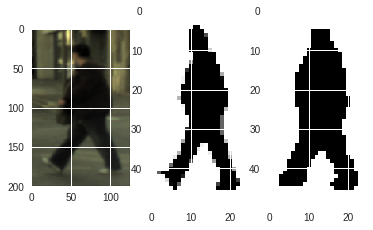

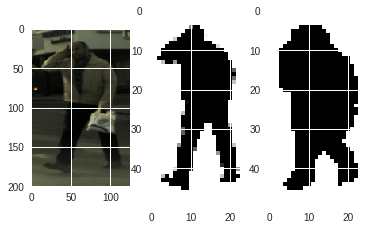

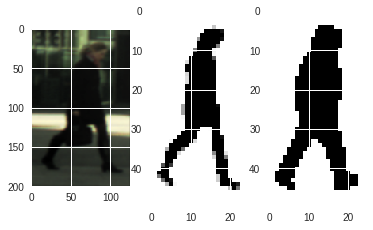

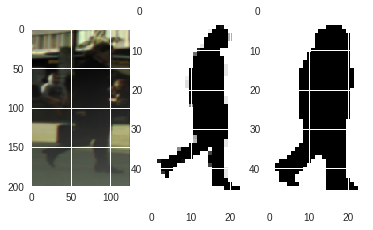

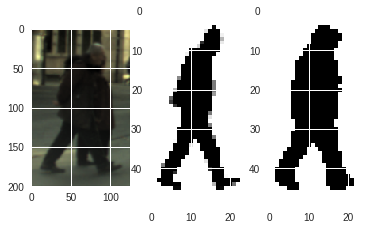

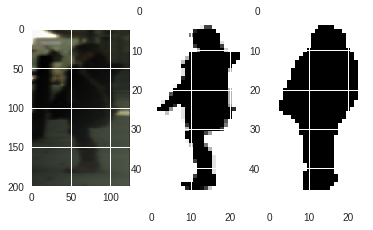

In [70]:
for i in range(m):
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(x_valid[i])
    plt.subplot(1,3,2)
    plt.imshow(y_valid[i,:,:,0])
    plt.subplot(1,3,3)
    plt.imshow(y_hat[i,:,:,0]>0.0005)